In [1]:
import pandas as pd
data=pd.read_csv('C:/ds_salaries.csv')
print(data.head())

   work_year experience_level employment_type                 job_title  \
0       2023               SE              FT  Principal Data Scientist   
1       2023               MI              CT               ML Engineer   
2       2023               MI              CT               ML Engineer   
3       2023               SE              FT            Data Scientist   
4       2023               SE              FT            Data Scientist   

   salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
0   80000             EUR          85847                 ES           100   
1   30000             USD          30000                 US           100   
2   25500             USD          25500                 US           100   
3  175000             USD         175000                 CA           100   
4  120000             USD         120000                 CA           100   

  company_location company_size  
0               ES            L  
1               US

In [2]:
#to check null values

data.isnull().sum()


print(data.info())

#so there is no null value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB
None


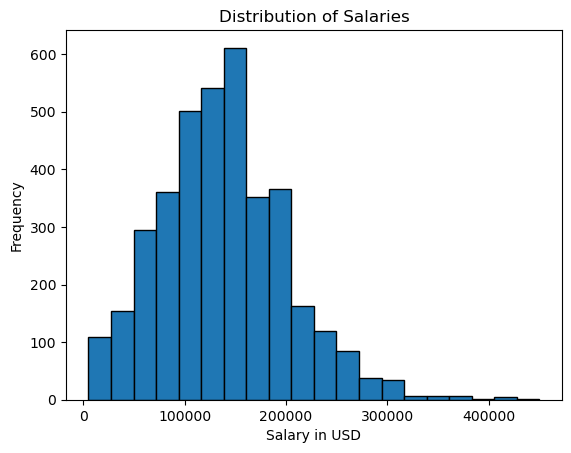

In [3]:
# Histogram of Salary:

import matplotlib.pyplot as plt
plt.hist(data['salary_in_usd'], bins=20, edgecolor='k')
plt.xlabel('Salary in USD')
plt.ylabel('Frequency')
plt.title('Distribution of Salaries')
plt.show()

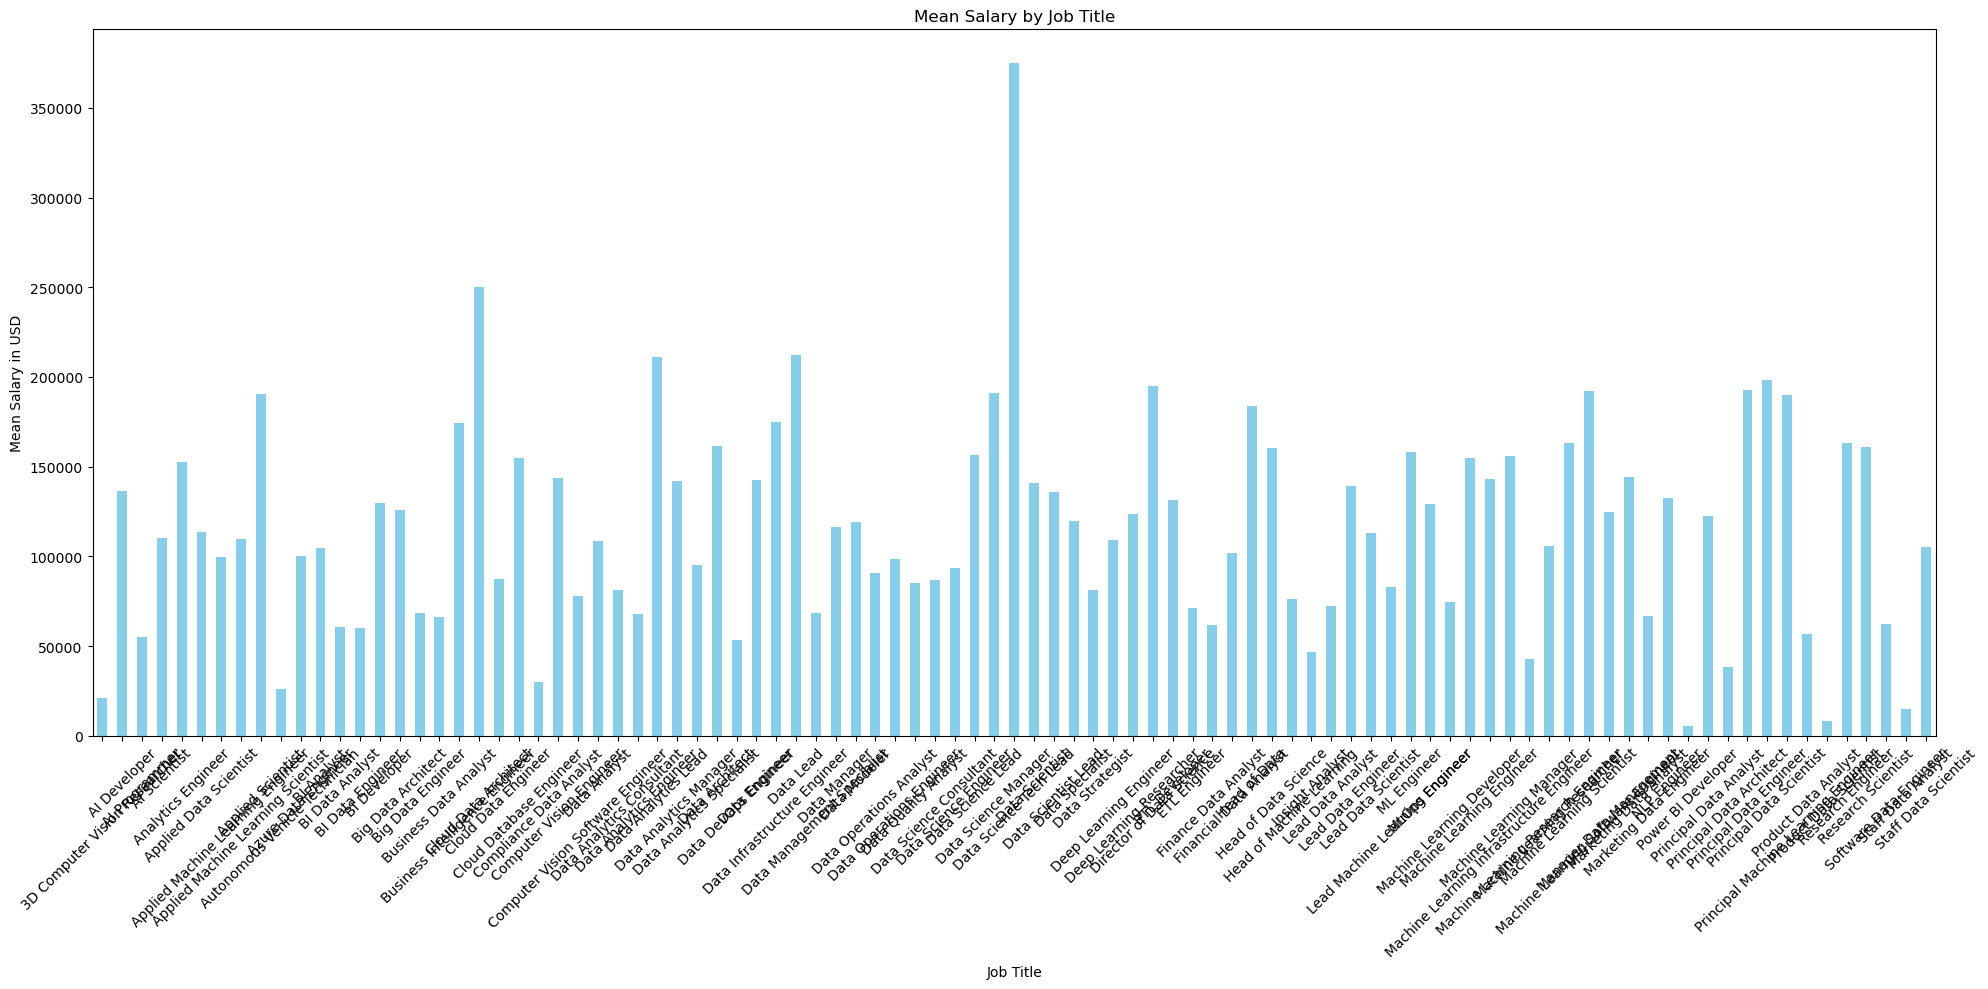

In [4]:
job_title_salaries = data.groupby('job_title')['salary_in_usd'].mean()

# Create a bar chart
plt.figure(figsize=(20, 10))
job_title_salaries.plot(kind='bar', color='skyblue')
plt.xlabel('Job Title')
plt.ylabel('Mean Salary in USD')
plt.title('Mean Salary by Job Title')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
#Explanation: A histogram will show you the distribution of salaries.
# You can see if it's normally distributed or skewed in any way, which can be important for modeling assumptions.

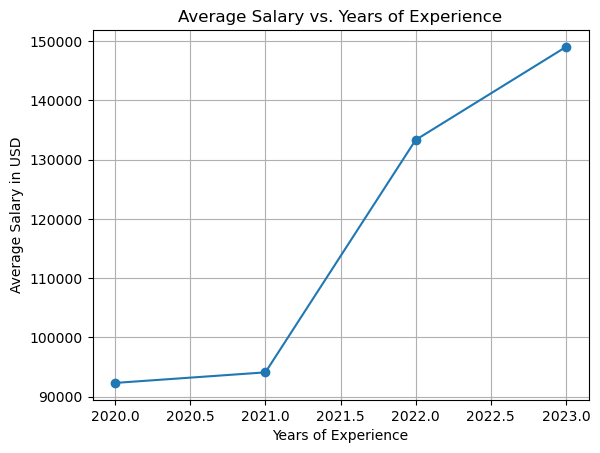

In [5]:
import matplotlib.pyplot as plt

# Group the data by years of experience and calculate the average salary for each group
average_salary_by_experience = data.groupby('work_year')['salary_in_usd'].mean().reset_index()

# Create a line plot
plt.plot(average_salary_by_experience['work_year'], average_salary_by_experience['salary_in_usd'], marker='o', linestyle='-')
plt.xlabel('Years of Experience')
plt.ylabel('Average Salary in USD')
plt.title('Average Salary vs. Years of Experience')
plt.grid(True)
plt.show()


In [6]:
# Split the data into features and target
x = data.drop(['salary_in_usd', 'salary_currency'], axis=1)
y = data['salary_in_usd']


In [7]:
# Encode categorical variables (if necessary)
x = pd.get_dummies(x, drop_first=True)

In [8]:
# Split the data into training and testing sets

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [12]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust n_estimators and other hyperparameters
model.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [13]:
# Make predictions on the test set
y_pred = model.predict(x_test)
y_pred

array([151160.04, 180009.  , 144000.  , 222170.9 , 228297.36,  42337.07,
       104998.9 , 100000.  ,  29955.87, 153062.04,  51727.44, 115000.  ,
       128000.  ,  33146.55, 128612.5 , 110225.81, 160000.  , 168013.05,
       210000.  , 153409.  , 140000.  ,  99072.1 , 258820.  , 200000.  ,
       134004.48, 170000.  , 200000.  , 120190.9 ,  58990.04, 145000.  ,
       143890.75, 137996.44, 216055.  ,  61668.32,  37482.31, 140000.  ,
       116303.88,   9983.84, 180176.4 , 188081.8 , 149670.22,  98188.1 ,
       130000.  , 210000.  , 205622.4 , 140000.  ,  86709.78, 102101.  ,
        83709.1 ,  67999.43,  28293.72,  50000.  , 371773.67,  99412.4 ,
       257648.5 , 160000.  , 108994.8 , 155000.  , 230012.5 , 132891.29,
        90680.2 , 150000.  ,  40301.86, 165000.  , 175255.13,  51155.89,
       175000.  , 133995.84, 180000.  , 140000.  , 205018.  ,  75000.  ,
       130672.7 , 105000.  ,  97865.  , 281555.9 , 195008.  , 128010.  ,
       229564.42,  92237.8 ,  67889.23, 140000.  , 

In [14]:
model.score(x_train,y_train)

0.9923362117308676

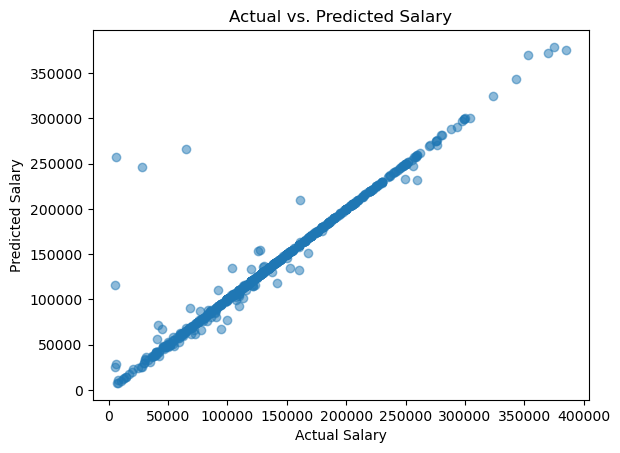

In [15]:
# Visualization of actual vs. predicted values
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Actual vs. Predicted Salary')
plt.show()

In [16]:
#Visual Inspection of Accuracy: It provides a visual representation of the relationship between the predicted and actual values. Data points that lie close to a 45-degree diagonal line (the line where predicted equals actual) indicate accurate predictions.
# Inaccurate predictions will deviate from this line.